# $\textbf{Final Reoprt - Israel Elections}$
##  $\textit{Party:}$ $\textbf{Balad}$
<!-- #### $\text{Eytan Slotnyk, Daniel Busbib and Nethanael Bohbot}$ -->

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw
code."></form>''')

In [ ]:
# %%shell
# jupyter nbconvert --to html /content/FinalReport.ipynb

[NbConvertApp] Converting notebook /content/FinalReport.ipynb to html
[NbConvertApp] Writing 1729640 bytes to /content/FinalReport.html


In [ ]:
# imports
import io
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy import stats 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
PARTY_NAME = 'בלד'

## $a:$ Background

**$Balad$** (**בלד**) was established ahead of the Fourteenth Knesset elections (1996). Politically, Balad is in the extreme left pole of the Israeli parties: it advocates the transformation of the State of Israel into the state of all its citizens and supports Israel's retreat from all territories

In addition, it works to maintain the national, cultural and ethical uniqueness of the Arab minority in Israel, supports the cancellation of recognition of the Zionist institutions of the State of Israel and requires recognition of Israeli Arabs as a national minority.

For the analysis of the elections, we used number of files from the site of the Central Election Commission (תוצאות ארציות: ועדת הבחירות המרכזית לכנסת) relevant to the 23, 24 and 25th knesset elections in the years 2020, 2021 and 2022 respectively.

In addition, we have used the file that shows the results by socio-economic status to be able to characterize voting data by demographic data.

Before we analyse the data, we cleaned the data by removing from the data lines such as the external envelopes when they were irrelevant and metadata columns.

In addition, in most of the sections, we only took the 13 parties who passed the 'ahuz hasima' in the election for the 24t and 25th Knesset elections, and in the 23rd Knesset elections the 9 major parties.

Then we split according to a predetermined formula (as shown in Lab 7) to suit the 13 parties who passed the 'ahuz hasima' in the 25rd Knesset elections to the data of the 24rd Knesset elections.

In [ ]:
# Load the files
uploaded = files.upload()

Saving eshkol_hevrati_calcali.csv to eshkol_hevrati_calcali.csv
Saving eshkol_hevrati_calcali.xlsx to eshkol_hevrati_calcali.xlsx
Saving votes per ballot 2021.csv to votes per ballot 2021.csv
Saving votes per ballot 2022.csv to votes per ballot 2022.csv
Saving votes per city 2020.csv to votes per city 2020.csv
Saving votes per city 2021.csv to votes per city 2021.csv
Saving votes per city 2022.csv to votes per city 2022.csv


In [ ]:
# Loading socio data
df_socio = pd.read_excel(io.BytesIO(uploaded['eshkol_hevrati_calcali.xlsx']), index_col='name')

In [ ]:
# Loading 2022 elections data by ballots
df_2022_raw_by_ballots = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2022.csv']),  encoding = None, index_col='שם ישוב')

df_2022_raw_by_ballots = df_2022_raw_by_ballots[df_2022_raw_by_ballots.index != 'מעטפות חיצוניות']

#Rename Parties
parties_dict_2022 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ב'  : "הבית היהודי", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "המחנה הממלכתי", 'שס'  : "שס", 'ום':'חדש-תעל','ד':'בלד'}

df_2022_raw_by_ballots.rename(columns=parties_dict_2022, inplace=True)

# preprocessing - Extract only parties columns
df_2022_by_ballots = df_2022_raw_by_ballots
df_2022_by_ballots = df_2022_by_ballots[df_2022_by_ballots.columns[10:-1]] # removing "metadata" columns
df_2022_by_ballots = df_2022_by_ballots.drop('זץ', axis='columns')


parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה"
     , 'ט'  : "הציונות הדתית",'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}
    
df_2021_raw_by_ballots = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')

# preprocessing of ballot - convert columns with the parties' names
df_2021_raw_by_ballots = df_2021_raw_by_ballots[df_2021_raw_by_ballots.index != 'מעטפות חיצוניות']
df_2021_raw_by_ballots.rename(columns=parties_dict_2021, inplace=True)
df_2021_raw_by_ballots = df_2021_raw_by_ballots[df_2021_raw_by_ballots.columns[:-1]]
df_2021_by_ballots = df_2021_raw_by_ballots.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_by_ballots = df_2021_by_ballots[df_2021_by_ballots.columns[9:]] # removing "metadata" columns


In [ ]:
# Loading elections 2022 & 2021 elections data by cities
df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2022_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2022.csv']),  index_col='שם ישוב')
df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')

# convert columns with the parties' names
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה"
     , 'ט'  : "הציונות הדתית",'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}
df_2021_raw.rename(columns=parties_dict_2021, inplace=True)

# preprocessing of cities 
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_by_cities = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns


#Rename Parties
parties_dict_2022 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ב'  : "הבית היהודי", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "המחנה הממלכתי", 'שס'  : "שס", 'ום':'חדש-תעל','ד':'בלד'}

df_2022_raw.rename(columns=parties_dict_2022, inplace=True)

# Extract only parties columns
df_2022 = df_2022_raw
df_2022_by_cities = df_2022[df_2022.columns[6:]] # removing "metadata" columns

# 2020 data
parties_dict_2020 = {'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת"
    , 'טב'  : "ימינה", 'נץ'  : "עוצמה יהודית", 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "כחול לבן", 'שס'  : "שס"}

df_2020_raw.rename(columns=parties_dict_2020, inplace=True)
df_2020_raw = df_2020_raw[df_2020_raw.columns[:-1]]
df_2020_raw = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019

df_2020_by_cities = df_2020_raw[parties_dict_2020.values()]

In [ ]:
# Merge the parties that are togeter in 2021 but were seperated in 2022:

#merging תקוה חדשה and כחול לבן to המחנה הממלכתי 
df_2021_by_cities['המחנה הממלכתי'] = df_2021_by_cities['תקוה חדשה'] + df_2021_by_cities['כחול לבן']
df_2021_by_cities.drop('תקוה חדשה', axis=1)
df_2021_by_cities.drop('כחול לבן', axis=1)

#splitting the הרשימה המשותפת to חדש-תעל and בלד
df_2021_by_cities['חדש-תעל'], df_2021_by_cities['בלד'] = 0.4 *df_2021_raw['הרשימה המשותפת'], 0.6 *df_2021_raw['הרשימה המשותפת']
df_2021_by_cities.drop('הרשימה המשותפת', axis=1)

#splitting ימינה to הבית היהודי and הציונות הדתית
df_2021_by_cities['הבית היהודי'], df_2021_raw['הציונות הדתית'] = 0.4 *df_2021_raw['ימינה'], 0.6*df_2021_raw['ימינה']
df_2021_by_cities = df_2021_by_cities.drop('ימינה', axis = 1)

## $b:$ Changes in the party

* **$2020$** - During these years the party `בלד` faced with the parties: `רעמ` and `חדש-תעל` as the party `הרשימה המשותפת`

* **$2021$** - `רעמ` split from the party `הרשימה המשותפת`.

* **$2022$** - In this year, `בלד` chose to run alone for elections.

Let's look at the results of the various *elections* during the years $2020-2022:$


In [ ]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

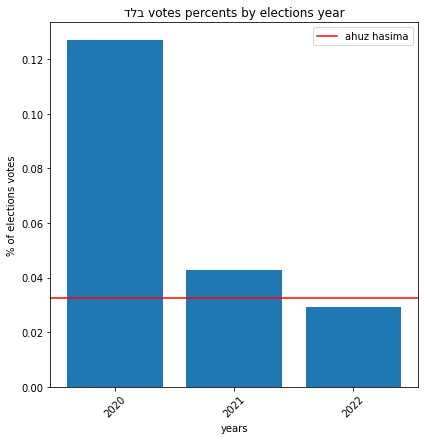

In [ ]:
vote_percents =  [parties_votes_percents(df_2020_by_cities, 0)['הרשימה המשותפת'],
                                parties_votes_percents(df_2021_by_cities, 0)['הרשימה המשותפת'],
                                parties_votes_percents(df_2022_by_cities, 0)['בלד']]
fig, ax = plt.subplots(figsize = (6,6))
idx = np.asarray([i for i in range(len(vote_percents))])
width = 0.8

ax.bar(idx, vote_percents, width=width)
ax.set_xticks(idx)
ax.set_xticklabels(['2020', '2021', '2022'], rotation=45)
ax.legend(['Votes percent'])
ax.set_xlabel('years')
ax.set_ylabel('% of elections votes')
fig.tight_layout()
ax.axhline(y=0.0325, color='red', linestyle='-', label='ahuz hasima')
plt.title('דלב votes percents by elections year')
plt.legend()
plt.show()


It can be seen that *before* the split, there was a place for the party `בלד` (within `הרשימה המשותפת`) in the Knesset and they **passed** the 'ahuz hasima'. However, *after* the split, the party did **not pass** the 'ahuz hasima' and was therefore left out.

Because there were split in the party `הרשימה המשותפת`, and the party `בלד` did not run alone in 2021, we made the following changes in the data of 2021 (with a rough assessment, as we saw in Lab 7) to analyse the party in the years 2021-2022: 
We add a column for `בלד` and we modify it to be *60%* of the votes of `הרשימה המשותפת` in 2021 and *40%* to `חדש-תעל` .

## $c:$ Voting percentage of voters against the party votes

We fix the data to $100$% votes with the change:

$V_i = \frac{kosher_i}{bzb_i}$

assuming that all those with the right to vote will vote:

In [ ]:
v = df_2022_raw['כשרים'].div(df_2022_raw['בזב'])
df_fix = df_2022_by_cities.div(v , axis = 'rows')

In [ ]:
# Bar plot for a party, only showing values above a certain threshold after fixing:
def party_bar_fix(df1, df2, thresh):
    width = 0.1  # set column width 
    votes = parties_votes_percents(df1, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()
    fixed_votes = parties_votes_percents(df2, thresh)
    # print(votes)
    # print(fixed_votes)
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots(figsize=(6,6))  # plt.subplots()
    all_bar = ax.bar(np.arange(1), votes[PARTY_NAME] if PARTY_NAME in votes else 0, width, color='skyblue')
    fix_bar = ax.bar(np.arange(1)+width, fixed_votes['בלד'], width, color='orange')
    ax.set_ylabel('Votes percent',fontsize=14)
    ax.set_title('Votes percents ' + 'בלד'[::-1] + ' 2022',fontsize=18)
    ax.axhline(y=0.0325, color='red', linestyle='-')
    ax.set_xticks(np.arange(1))
    ax.set_xticklabels('')
    ax.legend((all_bar[0], fix_bar[0]), ('בלד'[::-1], 'fixed'+'בלד '[::-1]))
    plt.show()

    return fig, ax


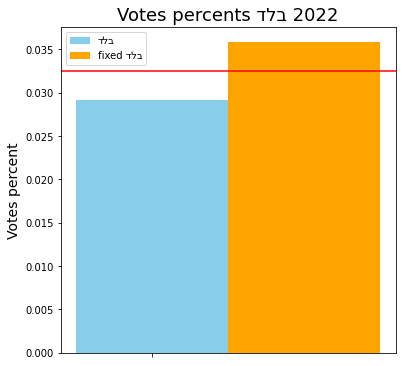

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f941851faf0>)

In [ ]:
party_bar_fix(df_2022_by_cities, df_fix, 0)

We can see that when looking at the results by ***cities***, If all the people who had voting rights would vote, the voting rate for `בלד` was higher than what was accepted in the actual election. In the election themselves, the voting rate for a `בלד` was 2.9% while if we had repaired the votes the expected voting rate was 3.58%.

In [ ]:
# fixing by ballots
v2 = df_2022_raw_by_ballots['כשרים'].div(df_2022_raw_by_ballots['בזב'])
df_fix_2 = df_2022_by_ballots.div(v2 , axis = 'rows')

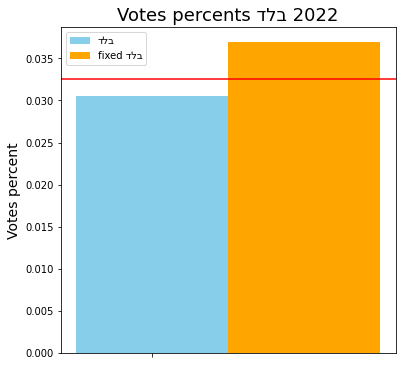

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f941861c940>)

In [ ]:
party_bar_fix(df_2022_by_ballots, df_fix_2, 0)

We can see that when looking at the results by ***ballots***, If all the people who had voting rights would vote, the voting rate for `בלד` was higher than what was accepted in the actual election. In the election themselves, the voting rate for a `בלד` was 3.05% while if we had repaired the votes the expected voting rate was 3.69%.

With the fixing we made, we can conclude that if all the people who had voting rights would vote, the party votes percent is enough to pass the 'ahuz hasima' (wich is 3.25%) to get in the knesset, although it was not the case in the 2022 elections.

In [ ]:
print('The estimated voting percentage among potential voters:')
print(f'{round((df_2022_by_ballots[PARTY_NAME].sum()/df_fix_2[PARTY_NAME].sum()) * 100, 2)} %')

The estimated voting percentage among potential voters:
52.4 %


## $d:$ Prevalence of voting

Let's see an analysis by **eshkols**. First, we will merge the data by eshkols with the data by cities of the elections in 2022 and then we will be able to see voting percentages by each eshkol.

In [ ]:
# Calculate votes percentage of parties for each eco levels.
def votes_percents_per_eco_level(df, thresh = 0):
    new_df = df.div(df.sum())
    return new_df[new_df > thresh]

In [ ]:
# Two df needed to be merged
df_socio.rename(columns=parties_dict_2022, inplace=True)
df_2022_raw_cities = pd.read_csv(io.BytesIO(uploaded['votes per city 2022.csv']))

In [ ]:
# Merge the data frames
merged_2022 = pd.merge(df_socio, df_2022_raw_cities, how='inner', left_on='set_code', right_on='סמל ישוב')
merged_2022 = merged_2022.set_index('שם ישוב')

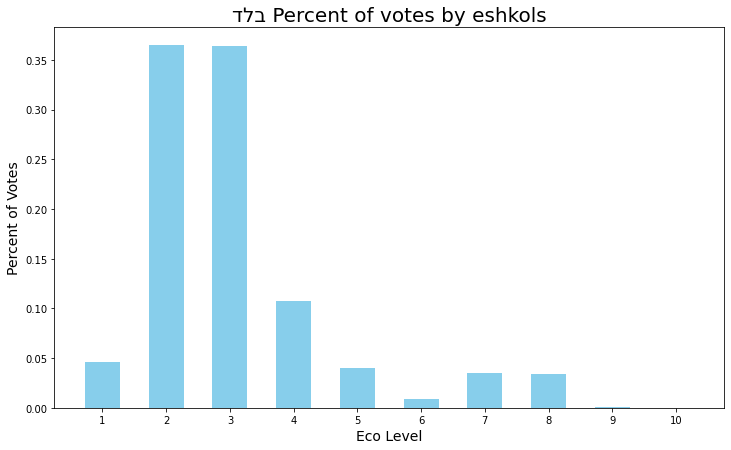

In [ ]:
# Take BLD party data
merged_2022_bld = merged_2022[{'ד': 'בלד'}]
merged_2022_bld['eco_level'] = merged_2022['eco_level']
merged_2022_bld_grp = merged_2022_bld.groupby('eco_level').sum()

# Plot
fig, ax = plt.subplots(figsize=(12, 7)) 
votes = votes_percents_per_eco_level(merged_2022_bld_grp['ד'])
ax.bar(np.arange(10), list(votes), 0.55, color='skyblue')
ax.set_title(PARTY_NAME[::-1] + ' Percent of votes by eshkols',fontsize=20)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(votes.keys())
ax.set_ylabel('Percent of Votes',fontsize=14)
ax.set_xlabel('Eco Level',fontsize=14)
plt.show()


It can be seen that the voting percentage of the party comes mainly from cities with low socio-economic status (1-5) and slightly comes from cities with relatively high socio-economic status (6-8). 

* Let's plot the votes percent by socio-eco status for the big 13 parties in 2022:

In [ ]:
top_13_parties = ['מחל', 'פה', 'ט', 'כן', 'שס', 'ג', 'ל', 'עם', 'ום', 'אמת', 'מרצ', 'ד', 'ב']

In [ ]:
#Compute voting frequencies for each party and each eshkol:
p_dict = {name: [] for name in top_13_parties}

for eshkol in range(10): # run over each eshkol
  # Find all cities in current eshkol
  rel_cities = np.where(merged_2022['eco_level'].values.astype('float') == eshkol+1)[0]
  # Compute parties total votes for cities in current eshkol (do not normalize)
  p = merged_2022.iloc[rel_cities][top_13_parties].sum()

  parties = p.keys()
  for i in range(len(top_13_parties)):
    p_dict[parties[i]].append(p[i])
p_df = pd.DataFrame(p_dict, index=list(range(1, 11)))

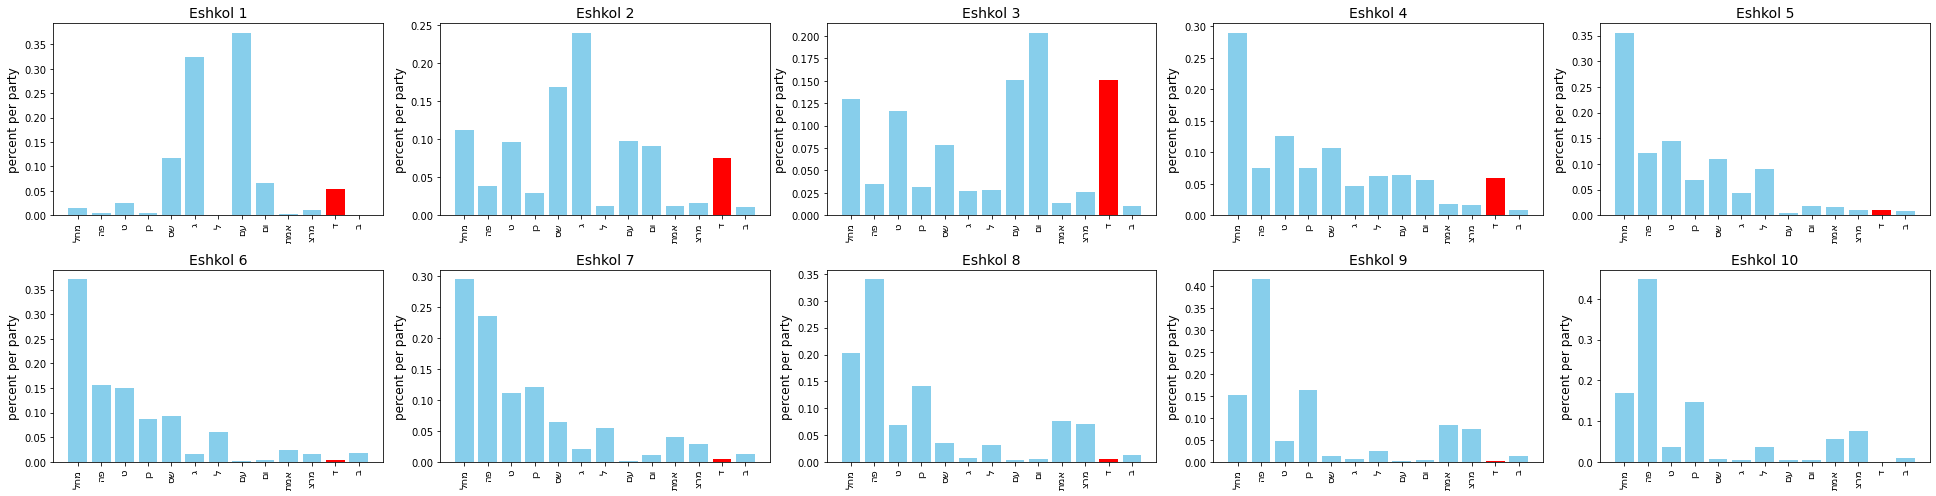

(<Figure size 1944x504 with 10 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f94155898b0>)

In [ ]:
def votes_percent_by_socio(df):
    fig, ax = plt.subplots(2, 5, figsize=(27,7))
    names_r = [n[::-1] for n in df.columns]

    x = df.columns
    for eshkol in range(10):      
        ax[eshkol//5, eshkol%5].bar(x, df.loc[eshkol+1].div(sum(df.loc[eshkol+1])),
                                    color=['r' if i == 'ד' else 'skyblue' for i in names_r])
        ax[eshkol//5, eshkol%5].set_title("Eshkol " + str(eshkol+1), fontsize=14)

    for ax in ax.flat:
        ax.set_xticklabels(names_r, rotation=90, fontsize=10)
        ax.set_ylabel('percent per party', fontsize=12)

    fig.tight_layout()     
    plt.show()
    return fig, ax

votes_percent_by_socio(p_df)  # in Red the BLD bar

In the *lower* eshkols there are **more** voting percentages to `בלד`, which matches the population in these cities. 

However, in *higher* eshkols we see that the big parties have high voting percentages, and `בלד` has **lower** voting percentage, as we were expecting to see.

## $e:$ Viewing votes by ballots with PCA

Let's plot the ballots 2 PC for the 2022 elections, coloring by the ***socio-economic*** level (according to lab 6):

In [ ]:
# take ballot data without תקוה חדשה
df_raw = df_2022_raw_by_ballots[df_2022_raw_by_ballots.columns[0:-1]]

# Create a merged data frame by using the pandas join commend:
merged_df = df_raw.join(df_socio.set_index('set_code'), on='סמל ישוב')
merged_df = merged_df.dropna()


In [ ]:
merged_pca = merged_df[df_2022_by_ballots.columns]

# Normalize to sum 1
merged_pca_norm = merged_pca.T.div(merged_pca.T.sum())

# color by eco level
color = merged_df['eco_level']

In [ ]:
# define PCA object
pca = PCA(n_components=2)

# fit model. Compute principal components
principalComponents1 = pca.fit_transform(merged_pca_norm.T)

# Perform PCA transformation
X_pca = pca.transform(merged_pca_norm.T)

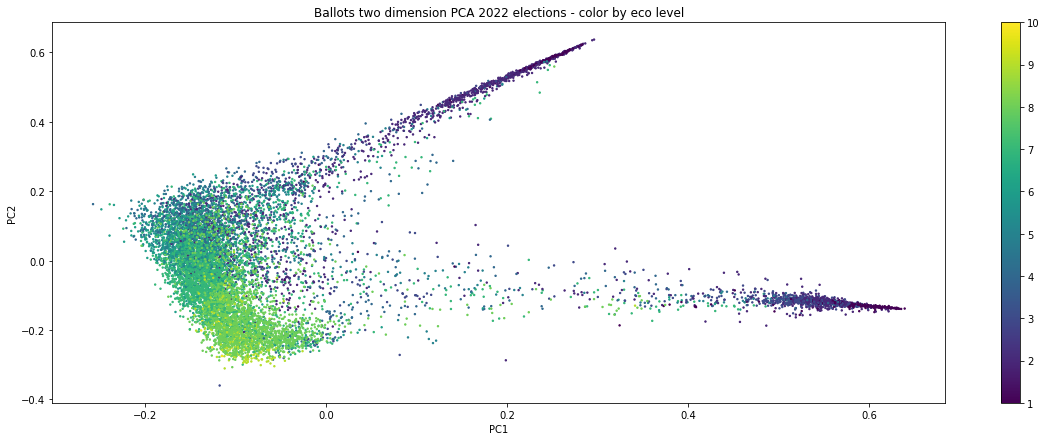

In [ ]:
# PCA plot for ballots in 2022  elections:
fig, ax = plt.subplots(figsize=(20, 7))
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], c = color, cmap='viridis', s = 2)
ax.set_title('Ballots two dimension PCA ' + str(2022) + ' elections - color by eco level')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(sc)
plt.show()

The ballots from cities with high socio-economic status are concentrated around the zero(0,0). On the other hand, the ballots from the cities with low socio-economic status receive higher values ​​in the first component (PC 1) and higher values ​​in the second component (PC 2), where they are divided into two main groups: Arabic areas (right down), and ballots in ultra -Orthodox areas (right up).

* Now the color of dots in the plot will indicate the ***prevalence (שכיחות)*** of voting to the party `בלד` in each ballot: 

In [ ]:
df_pca = df_2022_by_ballots

# take prevalence voting of BLD
p_bld =  df_pca.div(df_pca.sum(axis=1), axis=0)[PARTY_NAME]

# Normalize to sum 1
df_pca = df_pca.T.div(df_pca.T.sum())

In [ ]:
# define PCA object
pca = PCA(n_components=2)

# fit model. Compute principal components
principalComponents1 = pca.fit_transform(df_pca.T)

# Perform PCA transformation
X_pca = pca.transform(df_pca.T)

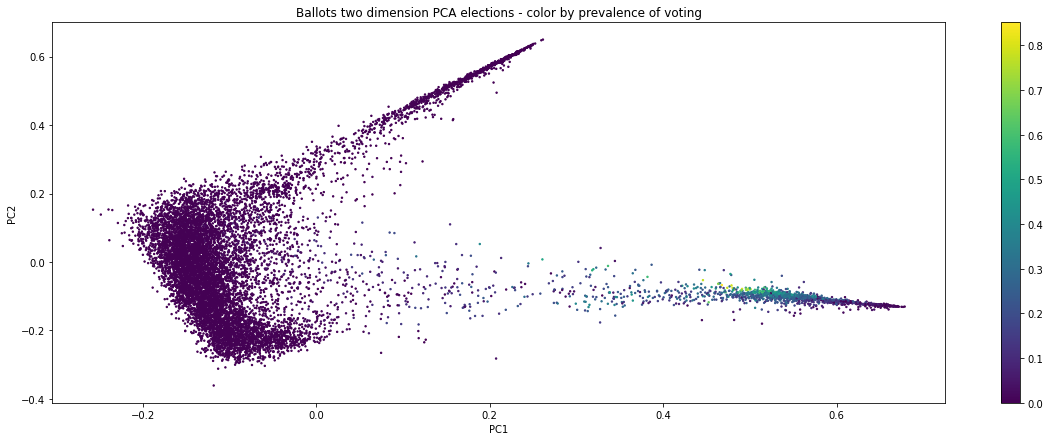

In [ ]:
# plot pca's on ballots
fig, ax = plt.subplots(figsize=(20, 7))
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=p_bld, s = 2)
ax.set_title('Ballots two dimension PCA elections - color by prevalence of voting')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(sc)
plt.show()

The result is not surprising, as the party is Arabic and indeed the graph has more prevalence of voting to `בלד` on the right down ballots pca's.

* Showing the PCA's with coloring by the **difference** between 2022 elections  votes percent to 2021 elections votes percent to `בלד` in each ballot (We will compare joint ballots of 2022 with 2021): 

In [ ]:
df_ballots_21_pca = df_2021_by_ballots.copy()
df_ballots_22_pca = df_2022_by_ballots.copy()

In [ ]:
# Fix 2021 ballots data to include BLD party by the same approx we made on data by cities of 2021
df_ballots_21_pca['חדש-תעל'], df_ballots_21_pca['בלד'] = 0.4 *df_ballots_21_pca['הרשימה המשותפת'], 0.6 *df_ballots_21_pca['הרשימה המשותפת']

In [ ]:
# Find same ballots from 2022 in 2021 by name of cities and number of ballot
df_ballots_21_pca.index = df_ballots_21_pca.index + df_2021_raw_by_ballots['קלפי'].astype(str)
df_ballots_22_pca.index = df_ballots_22_pca.index + df_2022_raw_by_ballots['קלפי'].astype(str)

In [ ]:
lst=[]
for i in range(len(df_2022_raw_by_ballots.index)):
  row_22 =  df_ballots_22_pca.iloc[i]
  row_21 = df_ballots_21_pca[df_ballots_21_pca.index  == row_22.name]
  if len(row_21) == 0:
    lst.append(-0.4)
  else:
    lst.append((row_22[PARTY_NAME]/row_22.sum() - row_21[PARTY_NAME].values[0]/row_21.values.sum()))


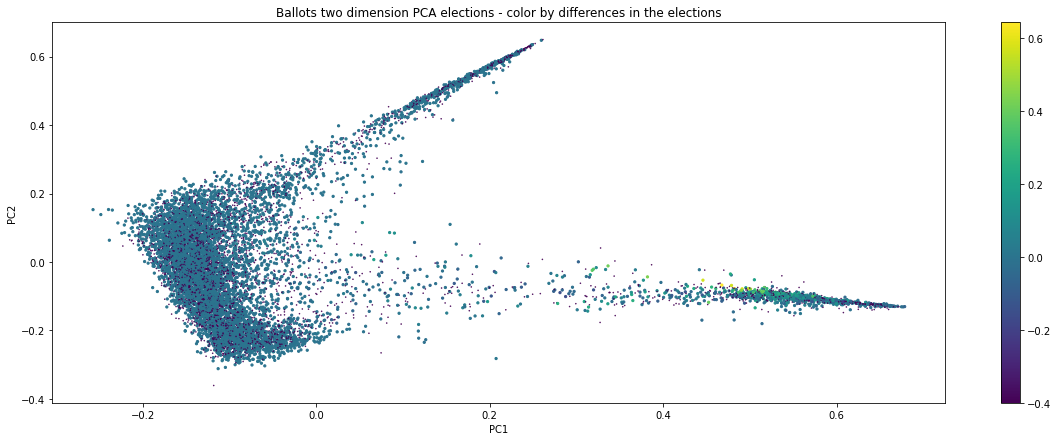

In [ ]:
# plot pca's on ballots
fig, ax = plt.subplots(figsize=(20, 7))
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=lst, s = [0.3 if i == -0.4 else 5 for i in lst])
ax.set_title('Ballots two dimension PCA elections - color by differences in the elections')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(sc)
plt.show()

<small> Note: we plot the pca's of the ballots that are in 2022 but not in 2021 in a small size and colored by purple and the ballots that were at both of the elections in large size. </small>

The center contains lots of ballots that were not in 2021 and those that were at both years had a very small change, if any, in the votes percent. Just in the right down of the graph, we can see there is small amount of ballots that there was a trend of increasing votes percent between the years in the Arabic areas of ballots.

## $f-h:$ Votes Transfer

We will present the transition of the new votes to the party, i.e. voters who switched to the party in the elections of 2022 from other parties in the previous elections (including those who did not vote in them).

* We'll find the transfer matrix $M^*$ using the least squares method - 
$M^*=argmin_M\|N^{(a)}M-N^{(b)}\|_F^2$ (as shown in Lab 9)
  
  First, we take only the 13 biggest parties of 2021, calculating their voting share and merging them to the 13 biggest parties of 2022 in the data by ballots.


In [ ]:
total_votes_22 = parties_votes_percents(df_2022_by_ballots, -0.1)  # total votes for each party
names_13_22 = total_votes_22.keys()[:13] # 13 parties

total_votes_21 = parties_votes_percents(df_2021_by_ballots, -0.1)  # total votes for each party
names_13_21 = total_votes_21.keys()[:13] # 13 parties

#Rearange:
names_13_22 = ['הליכוד', 'יש עתיד','שס',  'המחנה הממלכתי',
       'יהדות התורה', 'עבודה','הבית היהודי','ישראל ביתנו', 'רעם','בלד','הציונות הדתית', 'חדש-תעל',  'מרצ']

names_13_21 = ['הליכוד', 'יש עתיד', 'שס', 'כחול לבן', 'יהדות התורה', 'עבודה', 'ימינה',
       'ישראל ביתנו', 'הרשימה המשותפת', 'הציונות הדתית', 'תקוה חדשה', 'מרצ',
       'רעם']

col_22 = ['הליכוד', 'יש עתיד','שס',  'המחנה הממלכתי',
       'יהדות התורה', 'עבודה','הבית היהודי','ישראל ביתנו', 'רעם','בלד','הציונות הדתית', 'חדש-תעל',  'מרצ']

col_21 = ['הליכוד', 'יש עתיד', 'שס', 'כחול לבן', 'יהדות התורה', 'עבודה', 'ימינה',
       'ישראל ביתנו', 'הרשימה המשותפת', 'הציונות הדתית', 'תקוה חדשה', 'מרצ',
       'רעם']

In [ ]:
cols_21=np.copy(names_13_21).tolist()
cols_21.extend(['בזב','כשרים','קלפי' ,'סמל ישוב'])

cols_22=np.copy(names_13_22).tolist()
cols_22.extend(['בזב','כשרים','קלפי' ,'סמל ישוב'])

df_2021_ballot = df_2021_raw_by_ballots[cols_21].reset_index()
df_2022_ballot = df_2022_raw_by_ballots[cols_22].reset_index()

ballot_match = df_2021_ballot.set_index(['שם ישוב','קלפי', 'סמל ישוב']).join(df_2022_ballot.set_index(['שם ישוב','קלפי', 'סמל ישוב']), lsuffix = '-2021').dropna()

ballot_2022 = ballot_match[ballot_match.columns[15:]]
ballot_2021 = ballot_match[ballot_match.columns[0:15]]

cols_21=names_13_21
cols_21.extend(['בזב','כשרים'])

ballot_2021.columns = cols_21

In [ ]:
def corr_heat_map(M, parties_2022, parties_2021):
    n_22 = len(parties_2022)
    n_21 = len(parties_2021)

    fig, ax = plt.subplots(figsize = (12, 12))
    im = ax.imshow(M, cmap=plt.get_cmap('viridis'))

    ax.set_title("changes in voting preferences - M")
    ax.set_xticks(np.arange(n_22))
    ax.set_yticks(np.arange(n_21))
    # And to label them with the relevant parties names
    ax.set_xticklabels([n[::-1] for n in parties_2022], rotation=90)
    ax.set_yticklabels([n[::-1] for n in parties_2021])
    ax.set_xlabel("2022")
    ax.set_ylabel("2021")

    # Loop over data dimensions to create text annotations.
    for i in range(n_21):
        for j in range(n_22):
            text = ax.text(j, i, round(M[i, j], 3), ha="center", va="center", color="w")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('votes probability', rotation=-90, va="bottom")

    plt.show()

* We add the percent of non voted to the transfer matrix:

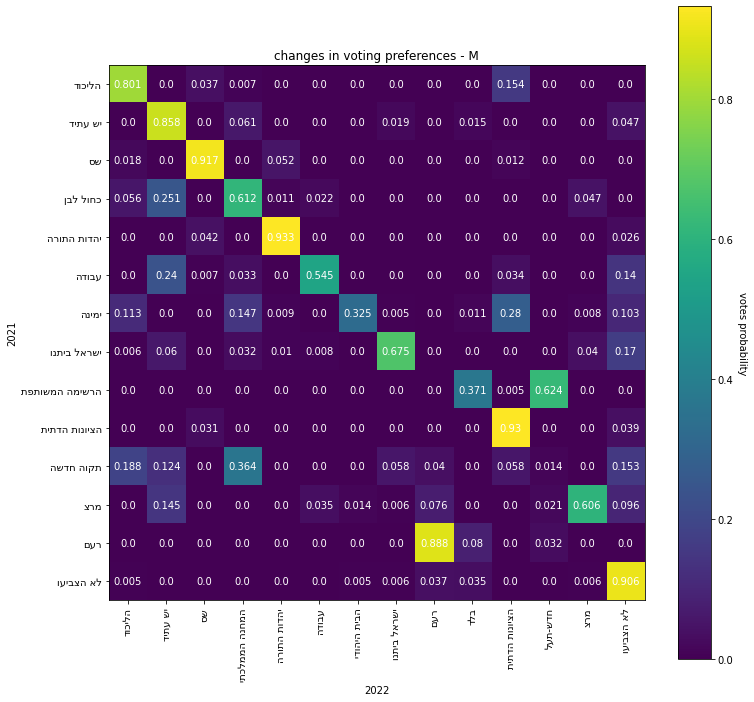

In [ ]:
ballot_2021['לא הצביעו'] = ballot_2021['בזב'] - ballot_2021['כשרים']
ballot_2022['לא הצביעו'] = ballot_2022['בזב'] - ballot_2022['כשרים']

names_13_21_nv = np.copy(col_21).tolist()
names_13_21_nv.extend(['לא הצביעו'])

names_13_22_nv = np.copy(col_22).tolist()
names_13_22_nv.extend(['לא הצביעו'])

#creating matrix of votes
n_a_nv = ballot_2021[names_13_21_nv].values
n_b_nv = ballot_2022[names_13_22_nv].values

# Calculating M
M_nv_a = np.linalg.pinv(n_a_nv.T @ n_a_nv) @n_a_nv.T @ n_b_nv
M_nv = pd.DataFrame(np.where(M_nv_a < 0.005, 0, M_nv_a),index=names_13_21_nv, columns=names_13_22_nv)
M_nv = M_nv.div(M_nv.sum(axis = 1), 0)
corr_heat_map(M_nv.values, names_13_22_nv, names_13_21_nv)

* Now we can see the votes transfer of `הרשימה המשותפת` which included the partyְְ `בלד`, from the 2021 elections to the 2022 elections:

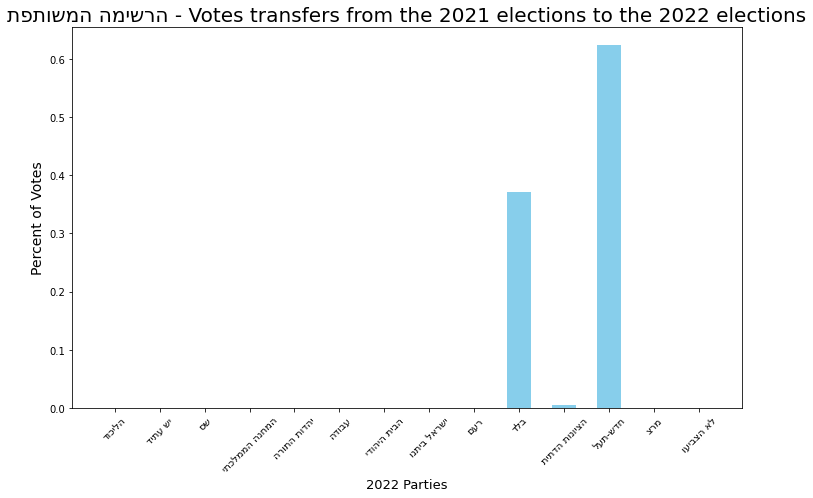

In [ ]:
# bar plot
fig, ax = plt.subplots(figsize=(12, 7)) 
cls = list(M_nv[8:9].columns)
ax.bar([c[::-1] for c in cls], list(M_nv[8:9].values[0]), 0.55, color='skyblue')
ax.set_title("הרשימה המשותפת"[::-1] + ' - Votes transfers from the 2021 elections to the 2022 elections',fontsize=20)
ax.set_xticks(np.arange(len(cls)))
ax.set_xticklabels([c[::-1] for c in cls],rotation = 45)
ax.set_ylabel('Percent of Votes',fontsize=14)
ax.set_xlabel('2022 Parties',fontsize=13)
plt.show()

It can be seen that **most** of the voters remained and votes for the member parties (`בלד`, `חדש-תעל`) of `הרשימה המשותפת` in the 2022 elections.


* We wiil see the transfer of new votes to the party, i.e. voters who switched to the party in the elections
2022 from other parties in the previous elections 2021 (including those who did not vote in them). 
  
  To check where the `בלד` received additional votes in 2022, we will take the party's column in the 2022 elections and *normalize* it.

In [ ]:
# Normalize the column of BLD from the vote transfer matrix
transfers22 = M_nv[PARTY_NAME].div(M_nv[PARTY_NAME].sum())

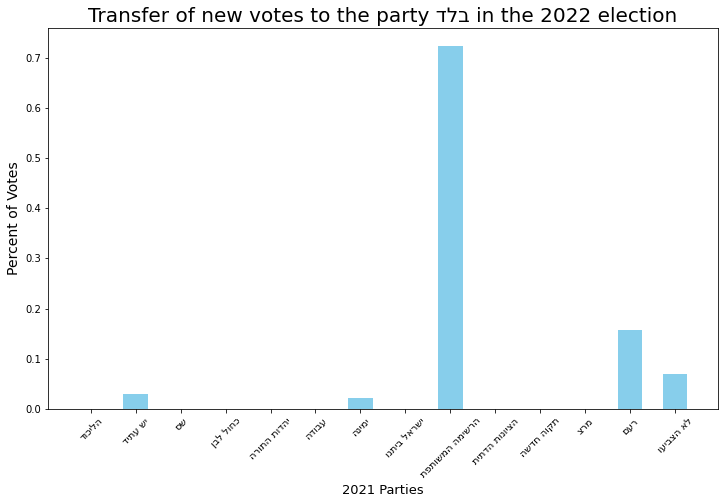

In [ ]:
# bar plot
fig, ax = plt.subplots(figsize=(12, 7)) 
# cls = list(M_nv[PARTY_NAME].index.drop(['כשרים', 'בזב']))
# ax.bar([c[::-1] for c in cls], transfers22.drop(['כשרים', 'בזב']), 0.55, color='skyblue')
cls = list(M_nv[PARTY_NAME].index)
ax.bar([c[::-1] for c in cls], transfers22, 0.55, color='skyblue')
ax.set_title('Transfer of new votes to the party ' + PARTY_NAME[::-1] + ' in the 2022 election',fontsize=20)
ax.set_xticks(np.arange(len(cls)))
ax.set_xticklabels([c[::-1] for c in cls],rotation = 45)
ax.set_ylabel('Percent of Votes',fontsize=14)
ax.set_xlabel('2021 Parties',fontsize=13)
plt.show()

Not surprisingly, most of the voters of `הרשימה המשותפת` votes to the party `בלד`. 

The **most** voters switched to party `בלד` from party `רעם`, as we mentioned above, she chose to run alone in the 2021 elections and split from the party with `בלד`.




* Now we will check how good the predictions of the vote transition model are for the party `בלד` in relation to other parties:

  1. First, we calculate the residual matrix for the model ( - predict the vote in the 2022 elections from the results of the 2021 elections).
  2. For each party we calculated the mean squared error - ***MSE***.

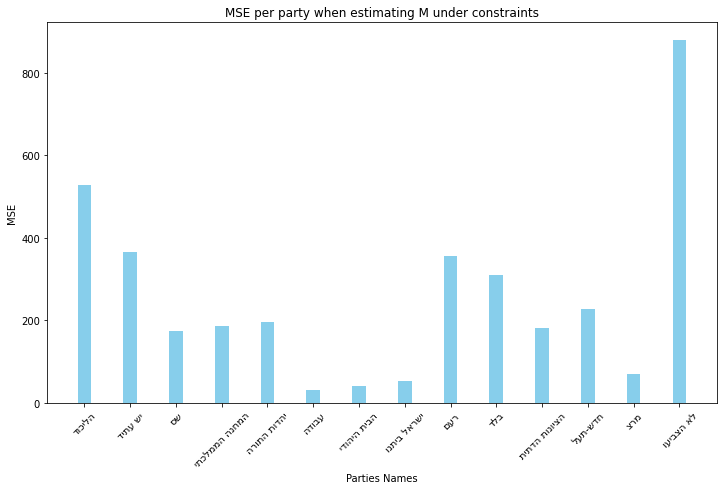

In [ ]:
# residuals
res_2 = n_a_nv @ M_nv - n_b_nv

# mse
mse_parties = np.power(res_2,2).mean(axis=0)

# bar-plot:
width = 0.3  # set column width 
n = n_b_nv.shape[1]  # number of parties
names = names_13_22_nv
rev_names = [name[::-1] for name in list(names)]

fig, ax = plt.subplots(figsize=(12, 7))  # plt.subplots()

mse_bar = ax.bar(np.arange(n), np.array(mse_parties), width, color='skyblue')

ax.set_ylabel('MSE')
ax.set_xlabel('Parties Names')
ax.set_title('MSE per party when estimating M under constraints')
ax.set_xticks(np.arange(n))
ax.set_xticklabels(rev_names, rotation=45)
plt.show()

We can see that the party `בלד` has a high MSE in relation to the other parties and the party is in a relatively not in good place compared to the other parties. We think this may be due to the fact that the party is Arab, so it is harder to predict the transition of voters between the elections in the different ballots, since this is also expressed in terms of demographics and geography and Arab parties are not the most stable.

Also, the "party" without voters has a great influence on the elections. This is because the non-voting population has the highest mean squared error meaning our prediction for this population is the weakest so they have the ability to change the results of the elections.


Let's Calculate the standard deviation using the bootstrap method for each element in the matrix $M^*$ from the above using the least squares method.
We use 100 iterations, where a bootstrap sample is sampled in each iteration
of c random ballot boxes with repetition where c is the number of shared ballot boxes. Now, use the normal approximation for the distribution of each element in the estimated matrix $M^*$ when it was assumed that each element is an unbiased estimator of $M$. Based on this approximation, we calculate a *p-value* for the same hypothesis testing problem from section and report it
on all **significant** values ​​for significance level $\alpha$ = 0.001.

In [ ]:
def show_mat_heat_map(M, parties_2022, parties_2021, title, bool = False):
    n_22 = len(parties_2022)
    n_21 = len(parties_2021)

    fig, ax = plt.subplots(figsize = (13,13))
    im = ax.imshow(M, cmap=plt.get_cmap('viridis'))

    ax.set_title(title)
    ax.set_xticks(np.arange(n_22))
    ax.set_yticks(np.arange(n_21))
    # And to label them with the relevant parties names
    ax.set_xticklabels([n[::-1] for n in parties_2022], rotation=90)
    ax.set_yticklabels([n[::-1] for n in parties_2021])
    ax.set_xlabel("2022")
    ax.set_ylabel("2021")

    # Loop over data dimensions to create text annotations.
    if bool :
        for i in range(n_21):
            for j in range(n_22):
                text = ax.text(j, i, round(M[i, j], 3), ha="center", va="center", color="w")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('votes probability', rotation=-90, va="bottom")

    plt.show()

In [ ]:
# Create a bootstrap sample. Sample rows with replacement
def bootstrap(n_a, n_b):
    # sample indices
    bal = np.random.randint(n_b.shape[0], size=n_b.shape[0])
    return n_a[bal,], n_b[bal,]

In [ ]:
# Fit the M matrix 
def fit_M(n_a, n_b, M_nnls=False, normalize=True):
    if M_nnls:
      M_hat = np.zeros((n_b.shape[1], n_a.shape[1]))
      for j in range(n_b.shape[1]):
        M_hat[j,:], r2 = nnls(n_a, n_b[:,j])
      M_hat = M_hat.T
    else: # fit_method != 'nnls'
      # Fit M on the bootstrap sample
      M_hat = np.linalg.inv(n_a.T @ n_a) @ n_a.T @ n_b
    
    if normalize:
      # applying constraints
      M_hat = np.where(M_hat < 0.005, 0, M_hat)
#      M_hat = M_hat.div(M_hat.sum(axis = 1), 0)
      M_hat /=  M_hat.sum(axis=1)[:,np.newaxis]  
    
    return M_hat

In [ ]:
# Function doing the bootstrap work
def fit_bootstrap_std(n_a, n_b, M_nnls = False, B=100):
  M_hat_sum = np.zeros((n_a.shape[1], n_b.shape[1]))
  M_hat_sum2 = np.zeros((n_a.shape[1], n_b.shape[1]))  
  for i in range(B): # loop on bootstrap samples
    # Create a bootstrap sample
    x_boot, y_boot = bootstrap(n_a, n_b)  # create a Bootstrap sample
    M_hat = fit_M(x_boot, y_boot, M_nnls, M_nnls) # normalize only nnls results     
    M_hat_sum = M_hat_sum + M_hat
    M_hat_sum2 = M_hat_sum2 + M_hat**2
    
  return np.sqrt(M_hat_sum2/B - (M_hat_sum/B)**2).T  # compute and return st.d. matrix

In [ ]:
# Compute pvalues matrix. We still use the t-distribution (can be replaced by zscores)
def compute_coef_pvals(n_a, n_b, M_nnls = False, normalize = False, B=100, h0_mij = 0):
    M = fit_M(n_a, n_b, M_nnls, normalize)
    if B>0: # use bootstrap
        std_mat = fit_bootstrap_std(n_a, n_b, M_nnls, B)
    else:  # use regression analytic formula
        mse = np.mean((n_a @ M - n_b)**2, axis = 0)
        std_mat = np.array([np.sqrt(i*(np.linalg.inv(n_a.T@n_a)).diagonal()) for i in mse])
    

    # Compute test statistic and p-value
    std_mat_non_zero = std_mat
    std_mat_non_zero[np.where(std_mat_non_zero <= 0 )] == 0.00001
    if h0_mij == 0:    
      t_stat_mat = np.array([M[i,:] /std_mat_non_zero[:,i] for i in range(n_a.shape[1])])  # Test H0: mij=0 (default) or H0: mij = 1 (if input h0_mij is set to one)
    else:
       t_stat_mat = np.array([(h0_mij-M[i,:]) /std_mat_non_zero[:,i] for i in range(n_a.shape[1])])  # Test H0: mij=0 (default) or H0: mij = 1 (if input h0_mij is set to one)

    p_val_mat = stats.t.cdf(-t_stat_mat, n_a.shape[0]-n_b.shape[1])
    p_val_mat = np.where(std_mat.T <= 0, 0.5, p_val_mat) # deal with constant bootstrap values 
    
    if h0_mij == 1: # here test only the diagonal
      t_stat_mat = np.diag(np.diag(t_stat_mat))
      p_val_mat = np.maximum(p_val_mat, 1 - np.identity(p_val_mat.shape[0]))

    return p_val_mat, t_stat_mat, std_mat

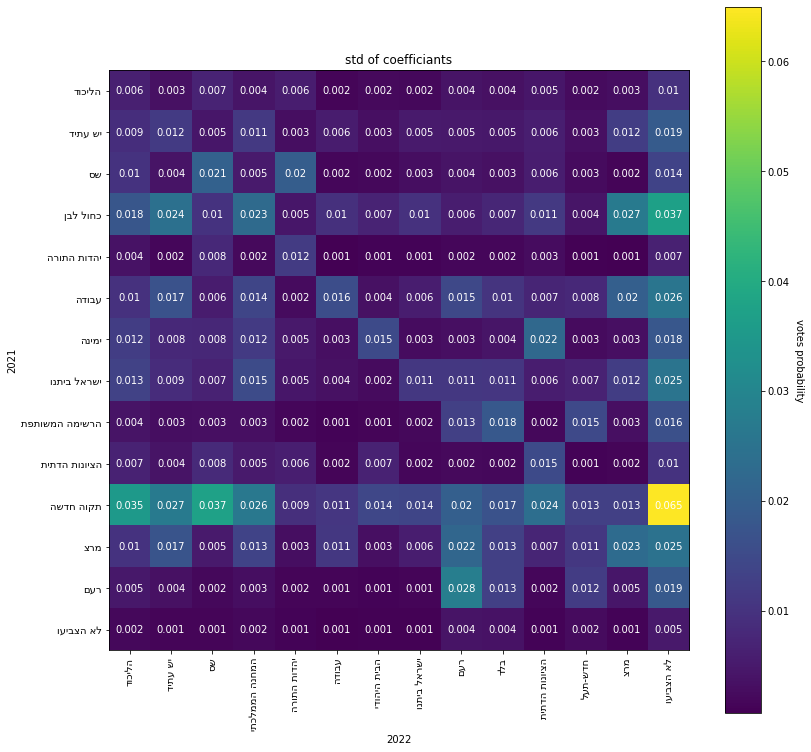

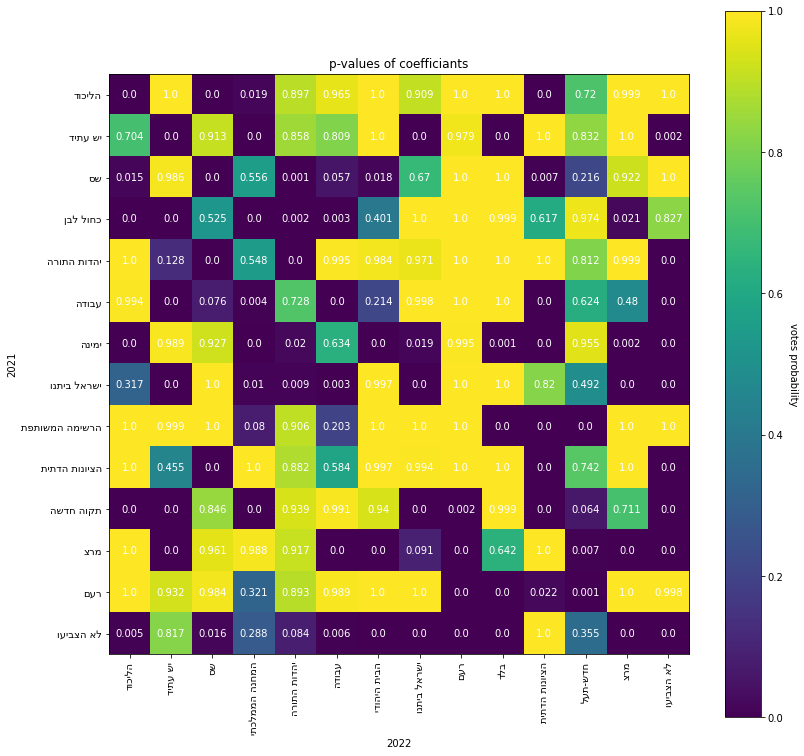

In [ ]:
# Compute p-values using bootstrap
p_val_boot, t_stat_boot, std_boot = compute_coef_pvals(n_a_nv, n_b_nv, False, False, 100)  

show_mat_heat_map(std_boot.T, names_13_22_nv, names_13_21_nv, 'std of coefficiants', True)
show_mat_heat_map(p_val_boot, names_13_22_nv, names_13_21_nv, 'p-values of coefficiants',  True)
# show_mat_heat_map((p_val_boot<0.001), names_13_22_nv, names_13_21_nv, 'p-values < 0.001')

Therefore, these are significant changes in votes **from** and **to** the party:

In [ ]:
p_val_boot, t_stat_boot, std_boot = compute_coef_pvals(n_a_nv, n_b_nv, False, False, 100)

In [ ]:
p_val_boot = pd.DataFrame(p_val_boot, columns = names_13_22_nv, index=names_13_21_nv)

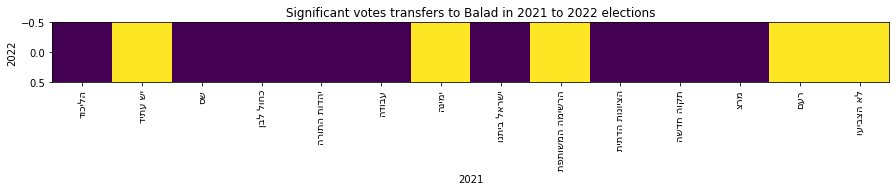

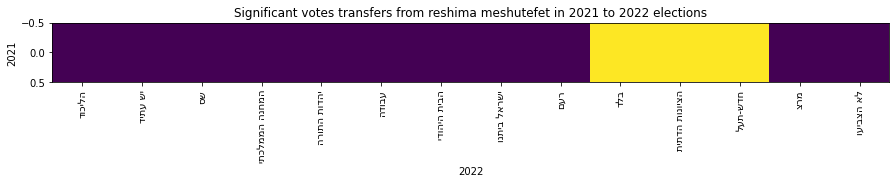

In [ ]:
s_to = [p_val_boot[PARTY_NAME] < 0.001]
s_from = [p_val_boot.T["הרשימה המשותפת"]<0.001]

n_22 = len(names_13_22_nv)
n_21 = len(names_13_21_nv)

fig, ax = plt.subplots(figsize = (15,8))
im = ax.imshow(s_to, cmap=plt.get_cmap('viridis'))
ax.set_xticklabels([n[::-1] for n in names_13_21_nv], rotation=90)
ax.set_xlabel("2021")
ax.set_ylabel("2022")
ax.set_title("Significant votes transfers to Balad in 2021 to 2022 elections")
ax.set_xticks(np.arange(n_21))
plt.show()

fig, ax = plt.subplots(figsize = (15,8))
im = ax.imshow(s_from, cmap=plt.get_cmap('viridis'))
ax.set_xticklabels([n[::-1] for n in names_13_22_nv], rotation=90)
ax.set_xlabel("2022")
ax.set_ylabel("2021")
ax.set_title("Significant votes transfers from reshima meshutefet in 2021 to 2022 elections")
ax.set_xticks(np.arange(n_22))
plt.show()

<small>Note: yellow represent true and purple represent false to the condition p-value < 0.001 </small>

We get that changes of votes *to* the party `בלד` in 2022 that are significant are from the parties יש עתיד, הרשימה המשותפת, רעם and the "party" of non-voters in 2021 elections.

Also, changes of votes *from* the party הרשימה המשותפת (that `בלד` was a part of this party in 2021) that are significant are from the parties בלד, הציונות הדתית, חדש-תעל in 2022 elections.


## $i:$  Suspicious ballots

In [ ]:
df_2021_raw = df_2021_raw_by_ballots.copy()
df_2022_raw = df_2022_raw_by_ballots.copy()

In [ ]:
# convert columns with the parties' names
df_2021_raw.rename(columns=parties_dict_2021, inplace=True)

# preprocessing of cities 
df_2021 = df_2021_raw
df_2021 = df_2021[df_2021.columns[10:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe

df_2022_raw.rename(columns=parties_dict_2022, inplace=True)
df_2022 = df_2022_raw[df_2022_raw.columns[10:-1]] # removing "metadata" columns

In [ ]:
total_votes = parties_votes_percents(df_2022, -0.1)  # total votes for each party
names_13 = total_votes.keys()[:13] # 13 parties
names = df_2022.columns # all parties names

In [ ]:
#Now we will merge the parties that are togeter in 2021 but were seperated in 2022:

#merging תקוה חדשה and כחול לבן to המחנה הממלכתי 
df_2021_raw['המחנה הממלכתי'] = df_2021_raw['תקוה חדשה'] + df_2021_raw['כחול לבן']
df_2021_raw.drop('תקוה חדשה', axis=1)
df_2021_raw.drop('כחול לבן', axis=1)

#splitting the הרשימה המשותפת to חדש-תעל and בלד
df_2021_raw['חדש-תעל'], df_2021_raw['בלד'] = 0.4 *df_2021_raw['הרשימה המשותפת'], 0.6 *df_2021_raw['הרשימה המשותפת']
df_2021_raw.drop('הרשימה המשותפת', axis=1)

#splitting ימינה to הבית היהודי and הציונות הדתית
df_2021_raw['הבית היהודי'], df_2021_raw['הציונות הדתית'] = 0.4 *df_2021_raw['ימינה'], 0.6*df_2021_raw['ימינה']
df_2021_raw = df_2021_raw.drop('ימינה', axis = 1)

In [ ]:
cols=names_13.tolist()
cols.extend(['פסולים','קלפי', 'בזב', 'כשרים','סמל ישוב'])

df_2021_ballot = df_2021_raw[cols].reset_index()
df_2022_ballot = df_2022_raw[cols].reset_index()

ballot_match = df_2021_ballot.set_index(['קלפי', 'סמל ישוב']).join(df_2022_ballot.set_index(['קלפי', 'סמל ישוב']), lsuffix = '-2021').dropna()

ballot_2022 = ballot_match[ballot_match.columns[17:34]]
ballot_2021 = ballot_match[ballot_match.columns[0:17]]
ballot_2021.columns = ballot_2022.columns

* We will calculate and show the ten ballots with the largest total squared difference between their voting shares for `בלד` in the two elections:

In [ ]:
parties_2021 = ballot_2021[names_13]
parties_2021 = parties_2021.div(parties_2021.sum(axis = 1), axis = 0)
parties_2022 = ballot_2022[names_13]
parties_2022 = parties_2022.div(parties_2022.sum(axis = 1), axis= 0)

In [ ]:
top_10_c = ((parties_2021[PARTY_NAME]-parties_2022[PARTY_NAME])**2).nlargest(10).index

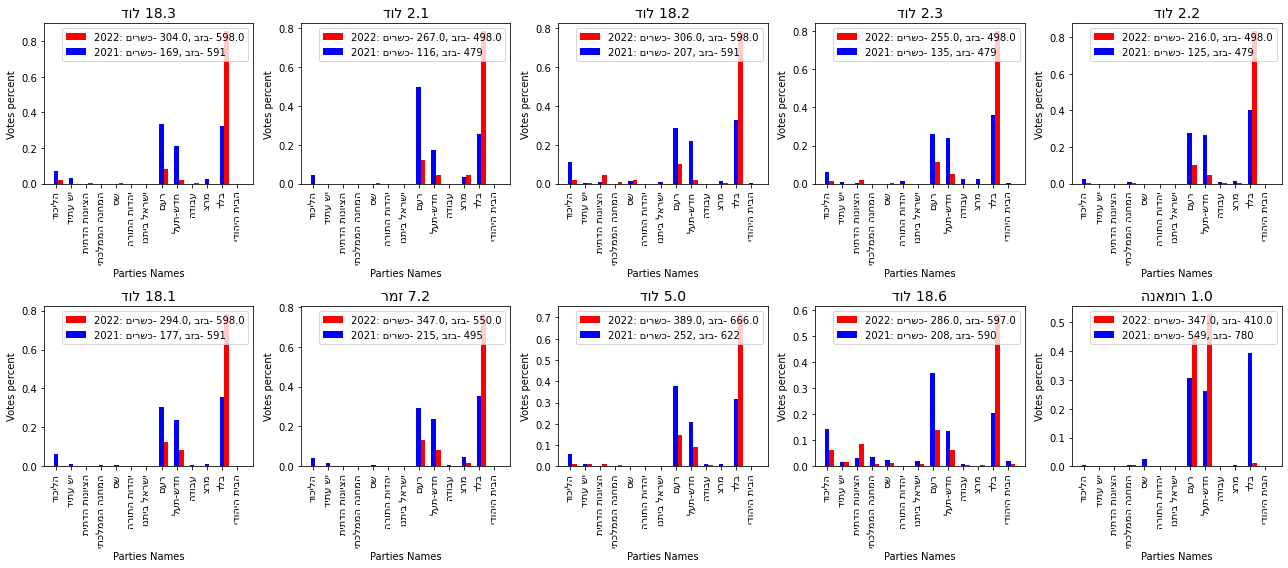

In [ ]:
# plot
fig, ax = plt.subplots(2, 5, figsize=(18,8))
width = 0.3  # set column width 
votes_2021 = parties_2021.loc[top_10_c]  # total votes for each party
votes_2022 = parties_2022.loc[top_10_c]

names = votes_2022.keys()
rev_names = [name[::-1] for name in list(names)]
n = 13 

for ballot in range(10):
    bar_2021 = ax[ballot//5, ballot%5].bar(np.arange(n), list(votes_2021.iloc[ballot]), width, color='b')
    bar_2022 = ax[ballot//5, ballot%5].bar(np.arange(n)+width, list(votes_2022.iloc[ballot]), width, color='r')
    ax[ballot//5, ballot%5].set_title(ballot_2021.loc[top_10_c[ballot], 'שם ישוב'][::-1] + " " + str(top_10_c[ballot][0]) , fontsize=14)

    ax[ballot//5, ballot%5].set_xticks(np.arange(n))
    ax[ballot//5, ballot%5].set_xticklabels(rev_names, rotation = 90)
    ax[ballot//5, ballot%5].legend((bar_2022[0], bar_2021[0]),
                                   ('2022: ' + 'םירשכ- '+ str(ballot_2022.loc[top_10_c[ballot], 'כשרים']) +
                                     ', בזב- ' + str(ballot_2022.loc[top_10_c[ballot], 'בזב']), 
                                    '2021: ' + 'םירשכ- '+ str(ballot_2021.loc[top_10_c[ballot], 'כשרים']) +
                                     ', בזב- ' + str(ballot_2021.loc[top_10_c[ballot], 'בזב'])))

for ax in ax.flat:
    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')

plt.tight_layout()
plt.show()



We can be clearly see that in the city Lod there is a big difference of votes percents in the different elections in a considerable amount of ballots.


Now let's see the diffrerences of votes percent in the city Lod:

In [ ]:
city = 'לוד'
# take the votes of the 13 biggest within the city
votes_21 = df_2021_by_cities[names_13].loc[city]
votes_22  = df_2022_by_cities[names_13].loc[city]

# normalize to get percents of votes
votes_21 = votes_21.div(votes_21.sum())
votes_22 = votes_22.div(votes_22.sum())

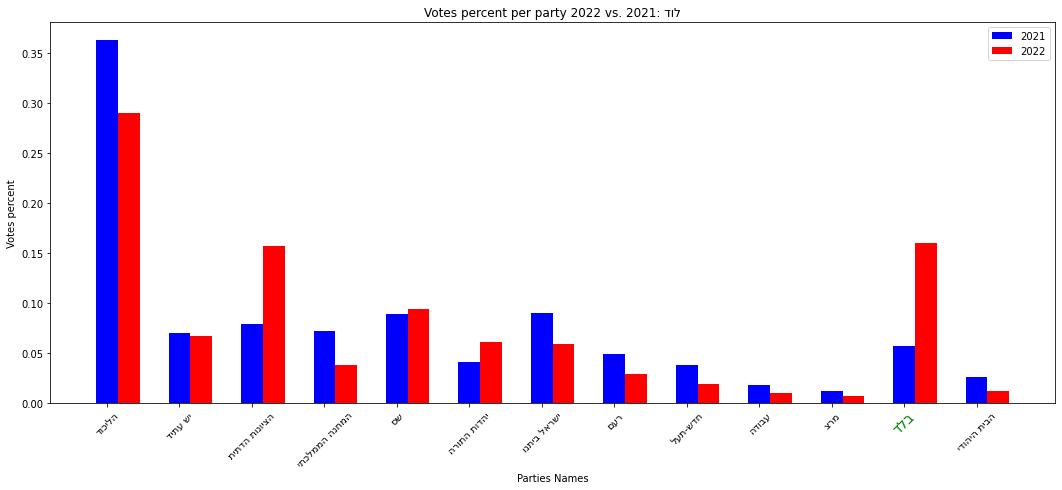

In [ ]:
# Plot votes percent in 2021 & 2022 elections in the city lod
width = 0.3  # set column width 
n = votes_21.shape[0]  # number of parties
names = votes_21.keys()

rev_names = [name[::-1] for name in list(names)]
fig, ax = plt.subplots(figsize=(18, 7))  # plt.subplots()

bar1 = ax.bar(np.arange(n), list(votes_21), width, color='b')
bar2 = ax.bar(np.arange(n)+width, list(votes_22), width, color='r')

ax.set_ylabel('Votes percent')
ax.set_xlabel('Parties Names')
ax.set_title('Votes percent per party 2022 vs. 2021: ' + str(city)[::-1])
ax.set_xticks(np.arange(n))
ax.set_xticklabels(rev_names, rotation = 45)
ax.legend((bar1[0], bar2[0]), ('2021', '2022'))

for i, xtick in enumerate(ax.get_xticklabels()):
    if votes_21.index[i] == PARTY_NAME:
      xtick.set_color('green')
      xtick.set_fontsize(14)

plt.show()

We can see that in the city of Lod there is indeed the most bigger difference of votes perecent between the elections to `בלד` in the city with regard to all the votes voted in the city.

Lod is a mixed city and we think that in the city the large shift in votes was probably due to the fact that people who did not vote in 2021 voted for the party in 2022, but it's still not clear if it is really the majority of all the voters who did not vote in the previous elections who voted for the party in the 2022 elections or if some did so fraudulently by changing votes in ballots  that had an Arab majority in the neighborhood.
